In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('../src')
from visual_corr import cat_cat, cont_cont, cat_cont, cont_label, cat_label, corr, drawRow
from utils import no_accent_vietnamese, FeatureFromColumn
from split_train_val import spanOneHot2dict, new_column, calcWeight, features2Dataset,\
overSampling, dataset2Folds, auc_plot, auc_value

In [3]:
from features_desc1 import notnull_list
from features_desc0 import null_list

In [4]:
Finit = pd.read_csv('../data/train.csv')
Finit1 = Finit[Finit.isnull().sum(axis=1) <= 40]
Finit0 = Finit[Finit.isnull().sum(axis=1) > 40]

/home/loitg/miniconda2/envs/creditscore/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
Fprovince_ext = pd.read_csv('./Fprovince_ext.csv')
Fprovince_ext_1 = Fprovince_ext.loc[Finit1.index]
Fprovince_ext_0 = Fprovince_ext.loc[Finit0.index]


F7ext = pd.read_csv('./F7ext.csv')
F7ext1 = F7ext.loc[Finit1.index]
F7ext0 = F7ext.loc[Finit0.index]

local1 = pd.concat([Finit1.drop(columns=['label']), Fprovince_ext_1.drop(columns=['label', 'province']), F7ext1], axis=1)
local0 = pd.concat([Finit0.drop(columns=['label']), Fprovince_ext_0.drop(columns=['label', 'province']), F7ext0], axis=1)

In [6]:
print(local0.shape)
print(local1.shape)

(9678, 104)
(20322, 104)


In [7]:
Ginit = pd.read_csv('../data/test.csv')
Ginit1 = Ginit[Ginit.isnull().sum(axis=1) <= 40]
Ginit0 = Ginit[Ginit.isnull().sum(axis=1) > 40]

/home/loitg/miniconda2/envs/creditscore/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
Gprovince_ext = pd.read_csv('./Fprovince_val.csv')
Gprovince_ext_1 = Gprovince_ext.loc[Ginit1.index]
Gprovince_ext_0 = Gprovince_ext.loc[Ginit0.index]


G7ext = pd.read_csv('./F7val.csv')
G7ext1 = G7ext.loc[Ginit1.index]
G7ext0 = G7ext.loc[Ginit0.index]

submit1 = pd.concat([Ginit1, Gprovince_ext_1.drop(columns=['province']), G7ext1], axis=1)
submit0 = pd.concat([Ginit0, Gprovince_ext_0.drop(columns=['province']), G7ext0], axis=1)

In [12]:
def uuu(l, s, selected_list):
    s['label'] = -1
    sl = pd.concat([s, l], axis=0, sort=True)
    cleaned = features2Dataset(sl, 'label', selected_list, allSingleForNN=True)
    a = cleaned[cleaned.label != -1]
    b = cleaned[cleaned.label == -1]
    del s['label']
    del b['label']
    return a, b

# selected_list1 = [f for f in notnull_list if f.isSure]
# (a, b) = uuu(local1, submit1, selected_list1)

In [13]:
selected_list1 = [f for f in notnull_list if f.isSure]
selected_list0 = [f for f in null_list if f.isSure]

local_cleaned_1, submit_cleaned_1 = uuu(local1, submit1, selected_list1)
local_cleaned_0, submit_cleaned_0 = uuu(local0, submit0, selected_list0)

# local_cleaned_1 = features2Dataset(local1, 'label', selected_list1, allSingleForNN=False)
# local_cleaned_0 = features2Dataset(local0, 'label', selected_list0, allSingleForNN=False)
# submit_cleaned_1 = features2Dataset(submit1, None, selected_list1, allSingleForNN=False)
# submit_cleaned_0 = features2Dataset(submit0, None, selected_list0, allSingleForNN=False)

0_FIELD_1
1_age_source2
2_age_source1
3_FIELD_5
4_FIELD_6
5_FIELD_7
6_FIELD_8
7_FIELD_10
8_FIELD_11
9_FIELD_12
10_FIELD_14
11_FIELD_15
12_FIELD_17
13_FIELD_18
14_FIELD_19
15_FIELD_20
16_FIELD_22
17_FIELD_25
18_FIELD_26
19_FIELD_29
20_FIELD_30
21_FIELD_31
22_FIELD_46
23_FIELD_47
24_FIELD_48
25_FIELD_51
26_FIELD_52
27_FIELD_53
28_FIELD_54
29_FIELD_56
30_FIELD_57
31_vung
32_CH
33_f7count
0_FIELD_7
1_FIELD_5
2_age_source1
3_age_source1
4_FIELD_48
5_CH
6_f7count


In [63]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate = 0.05, n_estimators=50, max_depth=4, verbosity=1)

train_weight = (local_cleaned_1['label']+0.009)
other_columns = [c for c in local_cleaned_1.columns if c != 'label']
model.fit(local_cleaned_1[other_columns], local_cleaned_1['label'], sample_weight=train_weight)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=1)

In [35]:
predicted_1

2        0.254880
3        0.399848
5        0.563097
6        0.360843
7        0.222826
           ...   
19992    0.484554
19994    0.123016
19995    0.528811
19998    0.715537
19999    0.521627
Length: 13496, dtype: float64

In [23]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(40,10), max_iter=1, activation = 'relu',solver='adam',random_state=0)
local_cleaned_1 = overSampling(local_cleaned_1, 'label')
other_columns = [c for c in local_cleaned_1.columns if c != 'label']
model.fit(local_cleaned_1[other_columns], local_cleaned_1['label'])

/home/loitg/miniconda2/envs/creditscore/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
predicted_1 = model.predict_proba(submit_cleaned_1[other_columns])

In [25]:
predicted_1 = pd.Series(data = predicted_1[:,1], index = Ginit1.index)

In [66]:
model = XGBClassifier(learning_rate = 0.05, n_estimators=11, max_depth=7, verbosity=1)

train_weight = calcWeight(local_cleaned_0['label'])
other_columns = [c for c in local_cleaned_0.columns if c != 'label']
model.fit(local_cleaned_0[other_columns], local_cleaned_0['label'], sample_weight=train_weight)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=11, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=1)

In [26]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(9,6), max_iter=6, activation = 'relu',solver='adam',random_state=0)
local_cleaned_0 = overSampling(local_cleaned_0, 'label')
other_columns = [c for c in local_cleaned_0.columns if c != 'label']
model.fit(local_cleaned_0[other_columns], local_cleaned_0['label'])

/home/loitg/miniconda2/envs/creditscore/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(9, 6), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=6, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
predicted_0 = model.predict_proba(submit_cleaned_0[other_columns])

In [28]:
predicted_0 = pd.Series(data = predicted_0[:,1], index = Ginit0.index)

In [29]:
predicted = pd.concat([predicted_0, predicted_1]).sort_index().rename('label')

In [30]:
finalrs = pd.merge(predicted, Ginit, left_index=True, right_index=True)[['id', 'label']]

In [31]:
finalrs

,id,label
0,30000,0.461090
1,30001,0.461090
2,30002,0.254880
3,30003,0.399848
4,30004,0.461090
...,...,...
19995,49995,0.528811
19996,49996,0.461090
19997,49997,0.461090
19998,49998,0.715537


In [89]:
finalrs.to_csv('./mlp_split_40-10-1_9-6-6_isSure_fixbug.csv', index=False)

In [68]:
1+1

2

In [69]:
local_cleaned_1

,0_FIELD_1,1_age_source2,2_age_source1,3_FIELD_5,4_FIELD_6,5_FIELD_7,6_FIELD_8,7_FIELD_10,8_FIELD_11,9_FIELD_12,...,25_FIELD_51,26_FIELD_52,27_FIELD_53,28_FIELD_54,29_FIELD_56,30_FIELD_57,31_vung,32_CH,33_f7count,label
1,1,0.000000,1,1,1,1,1,1,0,3,...,1,0,0,0,0,0,4,-1.0,-0.50,0
2,0,-0.311111,1,1,0,1,0,1,0,0,...,2,0,0,0,0,0,4,-1.0,-0.50,0
4,0,-0.511111,2,1,0,1,1,1,0,3,...,1,0,0,0,0,0,4,-1.0,-0.50,0
6,1,-0.355556,0,0,0,0,1,0,1,3,...,0,0,0,0,0,0,5,-1.0,-1.00,0
7,1,-0.266667,1,1,0,1,0,1,0,0,...,1,0,0,0,0,0,1,-1.0,-0.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,1,-0.111111,1,1,0,1,1,1,0,0,...,1,0,0,0,0,0,2,-1.0,-0.50,0
29994,1,0.000000,0,0,0,0,1,1,1,0,...,1,0,0,0,0,0,5,-1.0,-1.00,0
29995,0,-0.355556,2,1,0,1,0,1,1,0,...,1,0,0,0,0,0,0,-1.0,0.75,0
29996,0,-0.222222,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,4,-1.0,-0.25,0


In [72]:
submit_cleaned_1

,0_FIELD_1,1_age_source2,2_age_source1,3_FIELD_5,4_FIELD_6,5_FIELD_7,6_FIELD_8,7_FIELD_10,8_FIELD_11,9_FIELD_12,...,25_FIELD_51,26_FIELD_52,27_FIELD_53,28_FIELD_54,29_FIELD_56,30_FIELD_57,31_vung,32_CH,33_f7count,fl
2,0,-0.305263,1,1,0,1,1,0,0,0,...,2,0,0,0,0,0,2,-1.0,-0.428571,1
3,0,-0.452632,0,0,0,0,0,2,0,0,...,1,0,0,0,0,0,5,-1.0,-1.000000,1
5,1,-0.010526,1,1,0,1,1,2,0,0,...,0,0,0,0,0,0,8,-1.0,-0.714286,1
6,1,-0.536842,2,1,0,1,0,2,1,0,...,2,0,0,0,0,0,4,-1.0,-0.428571,1
7,0,-0.431579,2,1,1,1,1,0,1,0,...,1,0,0,0,0,0,3,-1.0,-0.428571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,0,-0.536842,0,0,0,0,0,2,1,0,...,2,0,0,0,0,0,5,-1.0,-1.000000,1
19994,0,-0.452632,2,1,1,1,0,0,1,0,...,0,0,0,1,0,0,6,-1.0,-0.142857,1
19995,1,-0.157895,1,1,0,1,0,0,0,0,...,2,0,0,0,0,0,8,-1.0,-0.714286,1
19998,1,-0.431579,2,1,0,1,0,2,1,0,...,2,0,0,0,0,0,1,-1.0,-0.142857,1


label,0,1
3_FIELD_5,,
0,4667,92
1,15371,192


<Figure size 432x288 with 0 Axes>

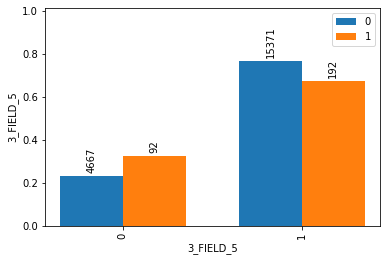

In [86]:
cat_label(local_cleaned_1, '5_FIELD_7', 'label', draw_to = './temp/test.png', figsize=(6,4))

In [12]:
submit_cleaned_1['fl'] =1

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

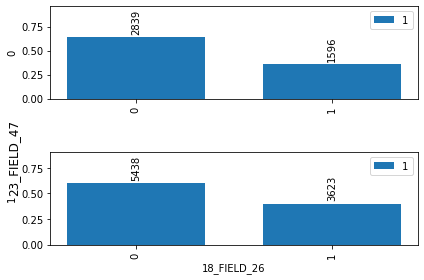

In [14]:
data = submit_cleaned_1
n = len(data.columns)
for i in range(n):
    c1 = data.columns[i]
    if data[c1].nunique() > 10: continue
    for j in range(n):
        c2 = data.columns[j]
        if j == i: continue
        if data[c2].nunique() > 10: continue
        cat_cat(data, c1, c2, 'fl', draw_to = './temp_submit1/%s==%s.png' % (c1,c2), figsize=(6,4))

In [1]:
submit_cleaned_1[['3_FIELD_5', '5_FIELD_7']]

NameError: name 'submit_cleaned_1' is not defined

<Figure size 432x288 with 0 Axes>

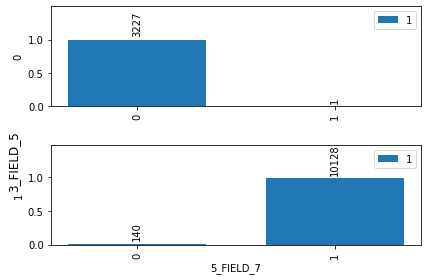

In [84]:
cat_cat(submit_cleaned_1, '3_FIELD_5', '5_FIELD_7', 'fl', draw_to = './temp/test.png', figsize=(6,4))

In [129]:
def doo(cleanedds, kfold=10, seed=8, **kwargs):
    folds = dataset2Folds(cleanedds, 'label', kfold=kfold, seed=seed)
    predicted_labels = []
    model = None
    for i in range(len(folds)):
        print('.', end='')
        from xgboost import XGBClassifier
        other = kwargs.copy()
        wr = other['wr']
        model = XGBClassifier(**other)

#         from sklearn.ensemble import GradientBoostingClassifier
#         model = GradientBoostingClassifier(n_estimators=50, learning_ratea=0.05, max_depth=4, random_state=seed)

#         from sklearn.neural_network import MLPClassifier
#         model = MLPClassifier(hidden_layer_sizes=(kwargs['l1'],kwargs['l2']), max_iter=1, activation = 'relu',solver='adam',random_state=seed)

#         from sklearn.naive_bayes import CategoricalNB
#         model = CategoricalNB()

        train_idx, test_idx = folds[i]
        train_ds = cleanedds.iloc[train_idx]
        train_ds = overSampling(train_ds, 'label')
        #train_weight = calcWeight(train_ds['label'])
        #train_weight = (train_ds['label']+wr)
        other_columns = [c for c in cleanedds.columns if c != 'label']
        model.fit(train_ds[other_columns], train_ds['label'])#, sample_weight=train_weight)

        test_ds = cleanedds.iloc[test_idx]
        predicted_label = model.predict_proba(test_ds[other_columns])
        predicted_labels.append(pd.DataFrame(index=test_ds.index, data=predicted_label, columns=[0,1]))


    predicted = pd.concat(predicted_labels).sort_index()
    return auc_value(cleanedds['label'], predicted[1])

In [133]:
params  = {'learning_rate': np.linspace(0.05, 0.06, 1),\
           'wr':np.linspace(0.008, 0.010, 1),\
          'n_estimators':np.linspace(60,140,5),\
          'max_depth':np.linspace(3,7,5)}

import time
def ttt(fixed, varied, ret, kfold):
    if len(varied) > 0:
        k = next(iter(varied))
        lspace = varied.pop(k)
        for v in lspace:
            if v.is_integer():
                v = int(v)
            newfixed = fixed.copy()
            newfixed[k] = v
            ttt(newfixed, varied.copy(), ret, kfold)
    else:
        vs = []
        millis = int(round(time.time() * 1000))%100000
        for seed in range(millis, millis + 4):
            v = doo(local_cleaned_1, kfold=kfold, seed=seed, **fixed)
            vs.append(v)
        vs = np.array(vs)
        fixed.update({'mean':vs.mean()*100, 'std':vs.std()*100})
        print()
        print(fixed)
        ret.append(fixed)
          
ret = []
ttt({} , params, ret, kfold=10)   

........................................
{'learning_rate': 0.05, 'wr': 0.008, 'n_estimators': 60, 'max_depth': 3, 'mean': 26.941605843264, 'std': 0.8546153037921059}
........................................
{'learning_rate': 0.05, 'wr': 0.008, 'n_estimators': 60, 'max_depth': 4, 'mean': 25.857477307200828, 'std': 1.1394338099017391}
........................................
{'learning_rate': 0.05, 'wr': 0.008, 'n_estimators': 60, 'max_depth': 5, 'mean': 23.32283010870895, 'std': 1.31373040824581}
........................................
{'learning_rate': 0.05, 'wr': 0.008, 'n_estimators': 60, 'max_depth': 6, 'mean': 23.273346662468068, 'std': 1.9478010711991658}
........................................
{'learning_rate': 0.05, 'wr': 0.008, 'n_estimators': 60, 'max_depth': 7, 'mean': 19.465840607071915, 'std': 0.43618541484453266}
........................................
{'learning_rate': 0.05, 'wr': 0.008, 'n_estimators': 80, 'max_depth': 3, 'mean': 27.75765218619834, 'std': 0.3700669456

In [36]:
params_rs = pd.DataFrame.from_records(ret)
params_rs.sort_values(by='mean').tail(20)

NameError: name 'ret' is not defined

In [131]:
params_rs = pd.DataFrame.from_records(ret)
params_rs.sort_values(by='mean').tail(20)

,learning_rate,wr,n_estimators,max_depth,mean,std
2,0.05,0.008,40,4,25.172458,1.802548
0,0.05,0.008,40,2,25.233939,1.016305
3,0.05,0.008,60,2,26.016155,0.361969
5,0.05,0.008,60,4,26.197509,0.444031
6,0.05,0.008,80,2,26.503530,1.608722
1,0.05,0.008,40,3,26.533460,1.151416
8,0.05,0.008,80,4,27.073551,1.981535
4,0.05,0.008,60,3,27.481636,0.472213
7,0.05,0.008,80,3,27.705871,0.938901


In [104]:
a = pd.read_csv('./mlp_split_40-10-1_9-6-6_isSure_fixbug.csv')
b = pd.read_csv('./xgboost_split_50-4-009_11-7_isSure_fixbug.csv')

In [114]:
c = pd.concat([a.set_index('id').rename(columns={'label':'a'}),b.set_index('id').rename(columns={'label':'b'})], axis=1)

In [120]:
def tt(row):
    a = min(row['a'], 1- row['a'])
    b = min(row['b'], 1- row['b'])
    if a < b:
        return row['a']
    else:
        return row['b']
    
d = c.apply(tt, axis=1)

In [125]:
c.reset_index()[['id','label']].to_csv('./max1-2.csv', index=False)